# INTRODUCTION:

The number of accidents has been rising globally due to increases in population and transportation.
Traffic accidents are a daily source of death, injury and property damage on roads and highways resulting in huge losses at economic and social levels.
According to the World Health Organisation (WHO), in 2018(1) around 1.35 million died as a result of a traffic accident.  

If we look more precisely at the figures for Seattle, in 2017(2), there were 10,959 police reported collisions and a further 1516 self-reported ones.
Fatalities were 19, and serious injuries 168.

# BUSINESS UNDERSTANDING:

As the demand for vehicles rises, the number of vehicles on the road and traffic jams increase, especially during rush hours. 
The local government of Seattle is trying to implement measures to alert vehicle users, police, traffic and health systems about critical situations – to reduce the number of accidents on the road. 
I will attempt to build a model to predict the severity of an accident given the weather, road conditions and location. 
By doing this, we should be able to make drivers more aware of having a vehicle accident. We can also predict the severity of an accident in this case.

This will be useful to the traffic department also to implement measures to decrease the risk of an accident.

# DATA SOURCE & DESCRIPTION:

The data used in this study was provided by Coursera, and had records on all types of collisions from 2004 through to present day.
It has 194.673 rows and initially 37 different independent variables. I will use the SEVERITYCODE as the dependent variable Y, with different independent variables to identify the cause and severity of road accidents.
SEVERITYCODE
Corresponds to the severity of the collision:
- 3 – fatality
- 2b – serious injury
- 2 – injury
- 1 – prop damage
- 0 – unknown

Other important variables to include are:
- ADDTYPE      Collision address, i.e.:
             - Alley
             - Block
             - Intersection             
- LOCATION     Description of the general location of the collision
- PERSONCOUNT  Total number of people involved in the collision
- PEDCOUNT     Total number of pedestrians involved in the collision
- PEDCYLCOUNT  Number of cyclists involved in the collision
- VEHCOUNT     Number of vehicles involved in the collision
- INCCDTTM     Date and time of accident
- JUNCTIONTYPE Category of junction where the accident happened
- WEATHER      Description of weather conditions at time of collision
- ROADCOND     Condition of road at time of collision
- LIGHTCOND    Light conditions at time of collision
- SPEEDING     Whether or not this was a factor in the collision (Y/N)


As there are null values in some records, the data needs to be pre-processed before any further processing.

The data will be analysed to predict the likelihood of a collision and it’s severity given a number of variables such as weather conditions, road conditions, time of day, period of year, etc.
These predictions will help the Department of Transport of Seattle to implement preventive measures as required.

#### Sources:
1.  WHO Global status report on road safety 2018: https://apps.who.int/iris/bitstream/handle/10665/277370/WHO-NMH-NVI-18.20-eng.pdf?ua=1 

2. Seattle Department of Transport 2018 Traffic Report: https://www.seattle.gov/Documents/Departments/SDOT/About/DocumentLibrary/Reports/2018_Traffic_Report.pdf


In [1]:
#Import some useful packages
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

!pip install pyscreenshot



In [2]:
#Data acquisition - from Coursera
! wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-30 14:33:47--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv.4’

100%[======================================>] 73,917,638  44.4MB/s   in 1.6s   

2020-09-30 14:33:49 (44.4 MB/s) - ‘Data-Collisions.csv.4’ saved [73917638/73917638]



In [3]:
#Loading data into dataframe 
df=pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#Get the size of the original dataset prior to cleaning
#This will be useful when we later quantify what percentage of the
#data we lose during cleaning.
df_shape_orig = df.shape
print("Shape of the original data frame: "+str(df.shape[0])+' x '+str(df.shape[1]))

Shape of the original data frame: 194673 x 38


In [5]:
#Check the types of data in the dataframe
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
print(df.loc[0,:])

SEVERITYCODE                                                      2
X                                                          -122.323
Y                                                           47.7031
OBJECTID                                                          1
INCKEY                                                         1307
COLDETKEY                                                      1307
REPORTNO                                                    3502005
STATUS                                                      Matched
ADDRTYPE                                               Intersection
INTKEY                                                        37475
LOCATION                                 5TH AVE NE AND NE 103RD ST
EXCEPTRSNCODE                                                      
EXCEPTRSNDESC                                                   NaN
SEVERITYCODE.1                                                    2
SEVERITYDESC                                    

In [7]:
#Check where there are NaNs in the dataframe
print(df.isnull().sum(axis=0))

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64


In [8]:
#Check SEVERITYCODE values

print(df["SEVERITYCODE"].value_counts())

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


DATA CLEANING:

There are a number of issues which must be addressed:
Rows which are missing information about the target variable: the objective of this model is to predict the car accident severity code ( SEVERITYCODE ) from the given features. 

Columns containing useless/redundant data. These columns can be removed from the dataframe and include:

- OBJECTID - this is just an database key, but Pandas creates its own key on import.
- COLDETKEY - this is just a duplicate of INCKEY, and probably arises due to a cross-matching of tables on the Seattle Open Data website. We will keep INCKEY as a unique identifier for each accident, but do not need to keep the duplicate column
- REPORTNO - this is just another identifier for the accident, this time tying the record to the individual piece of paperwork that was filed to report the accident. This is not useful for building our model.
- STATUS - the meaning of this column is unclear (and is not explained in the Attribute Information metadata). The values are either "Matched" or "Unmatched".
- EXCEPTRSNCODE, EXCEPTRSNDESC - these columns are listed in the Attribute Information metadata, but their meanings are not explained. EXCEPTRSNCODE is blank/NaN in ~99% of the data, with 2,480 accidents having a non-blank entry, all of which are the same ("NEI"). According to EXCEPTRSNDESC this means "Not Enough Information".
- INCDATE - this column is just a duplicate of the more easily parsable INCDTTM
- SDOTCOLNUM - this is another unique identifier for each accident, however as we are planning to keep INCKEY, keeping this second unique identifier is redundant.

Rows which are missing information about some of the features which we expect will be key to building the model: as we can see from df.head, a number of accidents (accounting for ~15% of the dataset) have "Unknown" values for attributes like WEATHER , ROADCOND and LIGHTCOND , or have these fields blank/NaN, which in practice means the same thing. As these are expected to be among the features which influence the likelihood and severity of accidents, we have to consider discarding these rows before training the model.
Presence of features with categorical values: In order to construct a model using Machine Learning techniques, we must take columns which contain categorical data and re-cast them in numeric form. Different techniques will be used to accomplish this, depending on the nature of the data in these columns.

Some columns, such as UNDERINFL and HITPARKEDCAR contain a mixture of alphanumeric (Y/N or 1/0), boolean (True/False) and missing (NaN) data. 
To prepare the data for modelling it will be important to homogenise these data by treating 1, Y and True as equivalent (and setting these to 1) and treating 0, N and False as equivalent (setting these to 0). Furthermore, we can infer that missing values (represented with NaN) are equivalent to 0/False.

Other columns contain labelled data (e.g. WEATHERCOND , which takes one of a handful of values such as RAIN , CLEAR , SNOWING , etc). T
These can be prepared for modelling by using One-Hot Encoding, wherein a new column is created for each of the discrete values corresponding to the original variable/column, which is filled with 1s or 0s depending on the value in that column.
Incorporating timestamp information: The INCDTTM column contains the incident date/time in alphanumeric form. This can be parsed to an actual timestamp using Pandas, and then separated in to separate columns for Hour, Day (of month) Day (of week), Month and Year to study temporal trends

Other issues: after performing the above data engineering issues, we will create a copy of the data frame (minus any columns which will not be used for model-building) and perform a final check for any remaining NaNs/missing data. We will decide how to handle these later.

DATA CLEANING:

In [9]:
#Drop columns that are not relevant or have NaN values
df = df.drop(columns = ['OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INCDATE', 'SDOTCOLNUM'])

In [10]:
# Check data set again
df.head()

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,...,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,...,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,...,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,...,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N


In [11]:
df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [12]:
df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [13]:
df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [14]:
df["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [15]:
#Separate Date/Time from INCDTTM colum and create columns for Hour/Minute, Day/Month/Year
df["INC_DATE_TIME"] = pd.to_datetime(df["INCDTTM"])
df["MONTH"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).month
df["DAY_OF_WEEK"] = df["INC_DATE_TIME"].dt.dayofweek
df["DAY_OF_MONTH"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).day
df["YEAR"] = pd.DatetimeIndex(df["INC_DATE_TIME"]).year

#Find the nearest whole hour to the time the collision occurred, e.g. 14:25 -> 14:00 and 14:35 -> 15:00
from datetime import datetime, timedelta

#Create new columns
df["TIME_ROUNDED_TO_NEAREST_HOUR"] = 0
df["DAY_STRING"] = 0
df["MONTH_STRING"] = 0
df["WEEKEND"] = 0

#Define some useful functions
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))

def get_dow(day_int):
    if day_int == 0:
        dow = 'Mon'
    if day_int == 1:
        dow = 'Tue'
    if day_int == 2:
        dow = 'Wed'
    if day_int == 3:
        dow = 'Thu'
    if day_int == 4:
        dow = 'Fri'
    if day_int == 5:
        dow = 'Sat'
    if day_int == 6:
        dow = 'Sun'
    return dow

def get_month(month_int):
    if month_int == 1:
        monthstring = 'Jan'
    if month_int == 2:
        monthstring = 'Feb'
    if month_int == 3:
        monthstring = 'Mar'
    if month_int == 4:
        monthstring = 'Apr'
    if month_int == 5:
        monthstring = 'May'
    if month_int == 6:
        monthstring = 'Jun'
    if month_int == 7:
        monthstring = 'Jul'
    if month_int == 8:
        monthstring = 'Aug'
    if month_int == 9:
        monthstring = 'Sep'
    if month_int == 10:
        monthstring = 'Oct'
    if month_int == 11:
        monthstring = 'Nov'
    if month_int == 12:
        monthstring = 'Dec'
    return monthstring
     
def is_weekend(day_int):
    if day_int <= 4:
        isweekend = 0
    else:
        isweekend = 1
    return isweekend



#Check the result of this
df.head(5)

,SEVERITYCODE,X,Y,INCKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,HITPARKEDCAR,INC_DATE_TIME,MONTH,DAY_OF_WEEK,DAY_OF_MONTH,YEAR,TIME_ROUNDED_TO_NEAREST_HOUR,DAY_STRING,MONTH_STRING,WEEKEND
0,2,-122.323148,47.703140,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,...,N,2013-03-27 14:54:00,3,2,27,2013,0,0,0,0
1,1,-122.347294,47.647172,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,...,N,2006-12-20 18:55:00,12,2,20,2006,0,0,0,0
2,1,-122.334540,47.607871,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,...,N,2004-11-18 10:20:00,11,3,18,2004,0,0,0,0
3,1,-122.334803,47.604803,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,...,N,2013-03-29 09:26:00,3,4,29,2013,0,0,0,0
4,2,-122.306426,47.545739,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,...,N,2004-01-28 08:04:00,1,2,28,2004,0,0,0,0


In [16]:
#Check the dataframe for any NaNs
print(df.isnull().sum(axis=0))

SEVERITYCODE                         0
X                                 5334
Y                                 5334
INCKEY                               0
ADDRTYPE                          1926
INTKEY                          129603
LOCATION                          2677
SEVERITYCODE.1                       0
SEVERITYDESC                         0
COLLISIONTYPE                     4904
PERSONCOUNT                          0
PEDCOUNT                             0
PEDCYLCOUNT                          0
VEHCOUNT                             0
INCDTTM                              0
JUNCTIONTYPE                      6329
SDOT_COLCODE                         0
SDOT_COLDESC                         0
INATTENTIONIND                  164868
UNDERINFL                         4884
WEATHER                           5081
ROADCOND                          5012
LIGHTCOND                         5170
PEDROWNOTGRNT                   190006
SPEEDING                        185340
ST_COLCODE               

In [17]:
#ST_COLCODE
#Find NaNs and set these to spaces.
print("How many are null: "+str(df["ST_COLCODE"].isnull().sum()))
print("Try to populate these with -999")
df["ST_COLCODE"].fillna(' ', inplace=True)
print("How many are null: "+str(df["ST_COLCODE"].isnull().sum()))

#Get rid of accidents with no ST_COLCODE (null and/or former NaNs)
todrop = df["ST_COLCODE"] == ' '

#Collate these and remove
df["TODROP"] = 0
for i in range(0,len(todrop)):
    if todrop[i] == True:
        df["TODROP"][i] = 1
        
print("There are "+str(df["TODROP"].values.sum())+" accidents without an ST_COLCODE.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in df:
    del df["TODROP"]
    del df["index"]

#Cast from type 'object' to type 'int'
df = df.astype({'ST_COLCODE':np.int64})
    
print("Dataframe shape now:")
df.shape

How many are null: 18
Try to populate these with -999
How many are null: 0


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


There are 4904 accidents without an ST_COLCODE.
 Deleting now...
Dataframe shape now:


(189769, 39)

In [18]:
#Missing geographical data
#Find null values and replace these with NaN
#Find NaNs and set these to spaces.
print("There are "+str(df["X"].isnull().sum())+" null location values. Will try to get X, Y data for these based on the locations of other accidents that share the same INTKEY.")

#Go through the accidents with no X,Y data and see if we can match them to others
#that share the same INTKEY
df["NOT_HAS_COORDS"] = df["X"].isnull()
count = 0
for i in range(0,len(df["X"])):
    if df["NOT_HAS_COORDS"][i] == True:
        if df["INTKEY"][i] > 0:
            #Find other accidents which share the same INTKEY
            matched_intersections = df.loc[df["INTKEY"] == df["INTKEY"][i]]
            #Do any of these have the required X,Y data?
            with_geodata = matched_intersections["X"].count()
            if with_geodata > 0:
                matched_intersections.head()
                count += 1

if "NOT_HAS_COORDS" in df:
    del df["NOT_HAS_COORDS"]
    
print("Added locations for "+str(count)+" accidents based on shared INTKEYS.")


There are 5187 null location values. Will try to get X, Y data for these based on the locations of other accidents that share the same INTKEY.
Added locations for 0 accidents based on shared INTKEYS.


In [19]:
#Remove accidents from the database which still have no location information
#X, Y
#Find NaNs and set these to spaces.
print("There are "+str(df["X"].isnull().sum())+" accidents with no location information")
print("Populate these with -999 and then delete")
df["X"].fillna(-999, inplace=True)
print("There are now "+str(df["ST_COLCODE"].isnull().sum())+" with NaN/null locations.")
print("I will now delete these...")

#Get rid of accidents with no ST_COLCODE (null and/or former NaNs)
todrop = df["X"] == -999

#Collate these and remove
df["TODROP"] = 0
for i in range(0,len(todrop)):
    if todrop[i] == True:
        df["TODROP"][i] = 1
        
print("There are "+str(df["TODROP"].values.sum())+" accidents without an location.\n Deleting now...")

#Delete the temporary column "TODROP" and re-index the data
todrop = df["TODROP"] == 1
df.drop(df.index[todrop], inplace=True)

#Re-index dataframe to account for missing rows
df.reset_index(inplace=True)

#Delete the temporary "TODROP" column from the DataFrame
if 'TODROP' in df:
    del df["TODROP"]
    del df["index"]

print("Dataframe shape now:")
df.shape

There are 5187 accidents with no location information
Populate these with -999 and then delete
There are now 0 with NaN/null locations.
I will now delete these...


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


There are 5187 accidents without an location.
 Deleting now...
Dataframe shape now:


(184582, 39)

Data Cleaning: Final remarks
We have spent a lot of time and effort so far cleaning the dataframe "df". 

This has included dropping uninformative columns, dropping rows which are missing one or more pieces of key information and casting categorical data in to numerical forms (integets/floats) that are suitable for machine learning algorithms to get their teeth into.
There are still some columns which we have kept so far as they have been informative up until now (e.g. _SDOT_COLDESC_ , which provides a description of the meaning of _SDOT_COLCODE_ ) but these too will have to be excluded from the dataframe before model-building can begin. Rather than drop these columns from the dataframe "df" we will instead create a new dataframe called "data", and simply drop the unnecessary columns from there.
In this manner it will be trivial to re-copy them back from "df" later if required.

In [20]:
#Keep the full dataframe, but create a copy which drops columns which will not be used for modelling
df_data = df.copy()
if 'INCKEY' in df:
    del df_data["INCKEY"]
    del df_data["INTKEY"]
    del df_data["ADDRTYPE"]
    del df_data["LOCATION"]
    del df_data["SEVERITYDESC"]
    del df_data["COLLISIONTYPE"]
    del df_data["INCDTTM"]
    del df_data["JUNCTIONTYPE"]
    del df_data["SDOT_COLDESC"]

In [21]:
#Check copied data set
print(df_data.shape)

(184582, 30)


In [22]:
#Count of how many null/NaN values there are in each column
print(df_data.isnull().sum(axis=0))

SEVERITYCODE                         0
X                                    0
Y                                    0
SEVERITYCODE.1                       0
PERSONCOUNT                          0
PEDCOUNT                             0
PEDCYLCOUNT                          0
VEHCOUNT                             0
SDOT_COLCODE                         0
INATTENTIONIND                  155408
UNDERINFL                            1
WEATHER                            189
ROADCOND                           122
LIGHTCOND                          276
PEDROWNOTGRNT                   179940
SPEEDING                        175863
ST_COLCODE                           0
ST_COLDESC                           0
SEGLANEKEY                           0
CROSSWALKKEY                         0
HITPARKEDCAR                         0
INC_DATE_TIME                        0
MONTH                                0
DAY_OF_WEEK                          0
DAY_OF_MONTH                         0
YEAR                     

# Data Exploration 1: Where do accidents occur?
The data set of Seattle's traffic accidents include the latitude and longitude (as X, Y, respectively) of every accident that occurred in the city council area. Let's create a map in Folium to see where these occur. 
This might highlight some key "choke points" in the city road network and give context for some of the predictions that eventually come out of the model.

In [24]:
#Import Folium library to visualise the accident locations
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [25]:
# define the map centered around Seattle 
lat = 47.6129432
lng = -122.4821475
seattle_map = folium.Map(location=[lat,lng], zoom_start=11)

# display world map
seattle_map

In [26]:
import pyscreenshot as ImageGrab
import json
import requests


In [27]:
# get the first 1000 collisions in the df_data dataframe
limit = 1000
df_data = df_data.iloc[0:limit, :]

In [28]:
#confirm dataframe size
df_data.shape

(1000, 30)

In [29]:
# instantiate a feature group for the incidents in the dataframe
collisions = folium.map.FeatureGroup()

# loop through the 1000 collisions and add each to the incidents feature group
for lat, lng, in zip(df_data.Y, df_data.X):
    collisions.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
seattle_map.add_child(collisions)

In [30]:
#Read the Seattle geojson data
import json
import requests

# download Seattle neighbourhood geojson file
!wget --quiet https://opendata.arcgis.com/datasets/b76cdd45f7b54f2a96c5e97f2dda3408_2.geojson
geofile = 'b76cdd45f7b54f2a96c5e97f2dda3408_2.geojson'
    
print('GeoJSON file downloaded!')

with open(geofile) as json_file:
    geodata = json.load(json_file)

print("There are "+str(len(geodata['features']))+" districts in the Seattle area:")

GeoJSON file downloaded!
There are 119 districts in the Seattle area:


In [31]:
#im=ImageGrab.grab()
#im.save('map3_accident_severity.png', format='png')
#im=ImageGrab.grab(bbox=(500,250,1480,830))

# Data exploration 2: Histograms


In [32]:
#Import Matplotlib and prepare inline plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

#Set up gpplot style
mpl.style.use('ggplot')

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [33]:
df["ADDRTYPE"].value_counts()

Block           121355
Intersection     63227
Name: ADDRTYPE, dtype: int64

There are 184582 entries in df currently.


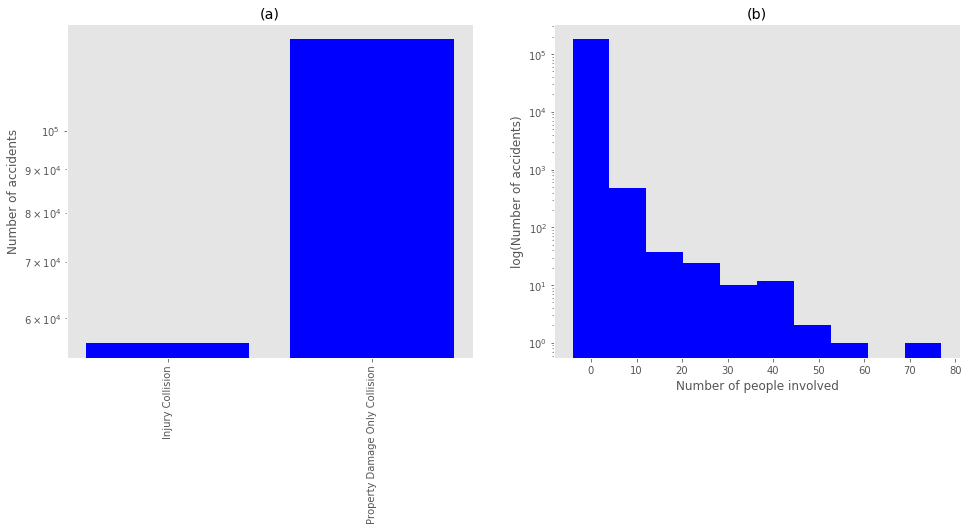

In [34]:
print("There are "+str(len(df))+" entries in df currently.")

#Create a 1x2 set of bar charts to describe the accident data

plt.rcParams["figure.figsize"] = (16,16)
#1 - Accident severities
plt.subplot(2,2,1)
freqs = Counter(df["SEVERITYDESC"])
xvals = range(len(freqs.values()))
plt.title("Distribution of accident outcomes")
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.yscale('log')

#2 - Number of people involved
plt.subplot(2,2,2)
freqs = Counter(df["PERSONCOUNT"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.xlabel("Number of people involved")
plt.ylabel("log(Number of accidents)")
plt.grid(b=None)
plt.hist(df["PERSONCOUNT"], align='left', color='blue')
plt.yscale('log')



plt.subplots_adjust(hspace=0.6)
#plt.savefig('./FigZZZ_accident_histograms.png', bbox_inches='tight')

In [35]:
#Metadata for the charts that follow:
#1 - Weather conditions
print('Frequency of weather types:')
print(df["WEATHER"].value_counts())
print(len(df["WEATHER"]))

Frequency of weather types:
Clear                       108953
Raining                      32008
Overcast                     27130
Unknown                      13891
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64
184582


In [36]:
#2 - Road conditions
print('Frequency of different road conditions:')
print(df["ROADCOND"].value_counts())

Frequency of different road conditions:
Dry               122070
Wet                46054
Unknown            13835
Ice                 1176
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64


In [37]:
#3 - Light conditions
print('Frequency of different light conditions:')
print(df["LIGHTCOND"].value_counts())

Frequency of different light conditions:
Daylight                    113569
Dark - Street Lights On      47311
Unknown                      12430
Dusk                          5774
Dawn                          2421
Dark - No Street Lights       1450
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


In [39]:
#4 - Month of year in which accident happens
print('Months of the year (there should be 12...)')
print(df["MONTH"].value_counts())

Months of the year (there should be 12...)
10    16797
6     15847
5     15793
11    15766
7     15616
8     15568
1     15484
3     15349
9     15238
4     15169
12    14734
2     13221
Name: MONTH, dtype: int64


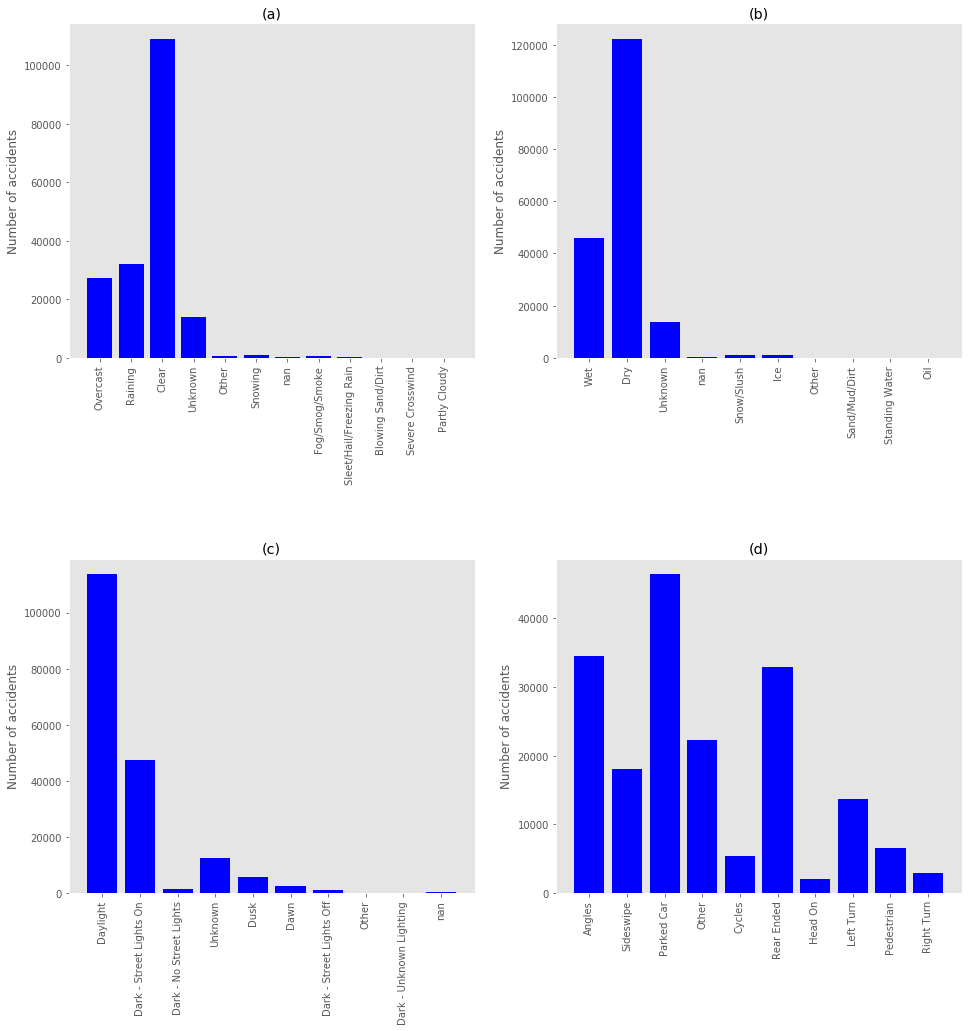

In [40]:
#Create a 2x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,16)
#1 - Weather conditions
plt.subplot(2,2,1)
freqs = Counter(df["WEATHER"])
xvals = range(len(freqs.values()))
plt.title('(a)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#2 - Road conditions
plt.subplot(2,2,2)
freqs = Counter(df["ROADCOND"])
xvals = range(len(freqs.values()))
plt.title('(b)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#3 - Light conditions
plt.subplot(2,2,3)
freqs = Counter(df["LIGHTCOND"])
xvals = range(len(freqs.values()))
plt.title('(c)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')

#4 - ADDRTYPE
plt.subplot(2,2,4)
freqs = Counter(df["COLLISIONTYPE"])
xvals = range(len(freqs.values()))
plt.title('(d)')
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, freqs.values() , color='blue')
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.subplots_adjust(hspace=0.6)
#plt.savefig('./FigZZZ_accidents_by_roadcond.png', bbox_inches='tight')

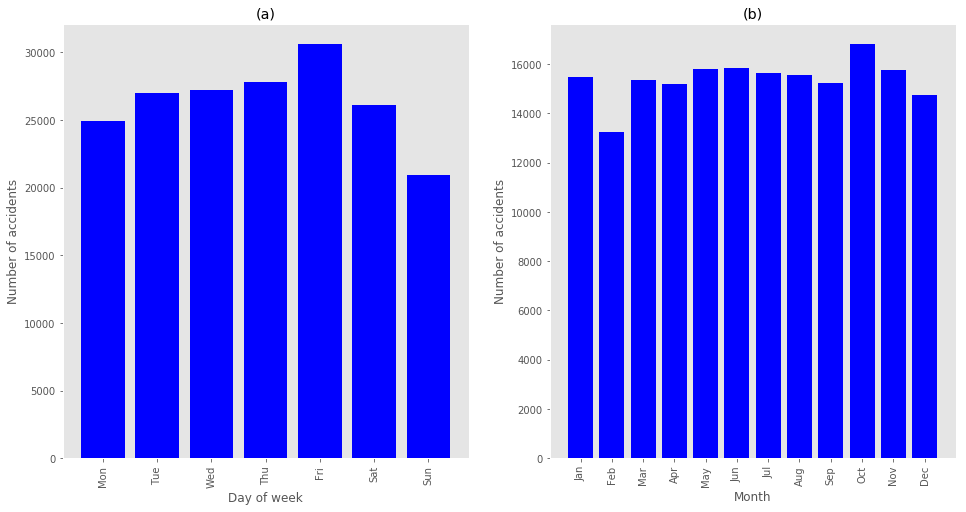

In [41]:
#Create a 1x2 set of bar charts to describe the accident data
plt.rcParams["figure.figsize"] = (16,8)

#1 - Day of week in which accident happens
plt.subplot(1,2,1)
freqs = Counter(df["DAY_OF_WEEK"])
xvals = range(len(freqs.values()))
#Order the days
ordered = dict(sorted(freqs.items()))
daynames = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.title('(a)')
plt.xlabel("Day of week")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='blue')
plt.xticks(xvals, daynames, rotation='vertical')

#2 - Month of year in which accident happens
plt.subplot(1,2,2)
freqs = Counter(df["MONTH"])
xvals = range(len(freqs.values()))
#Order the months
ordered = dict(sorted(freqs.items()))
monthnames = ['Jan','Feb','Mar','Apr','May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.title('(b)')
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.grid(b=None)
plt.bar(xvals, ordered.values() , color='blue')
plt.xticks(xvals, monthnames, rotation='vertical')
plt.subplots_adjust(hspace=0.6)
#plt.savefig('./FigZZZ_accidents_by_DOW_month.png', bbox_inches='tight')

## Pre-Processing: Feature extraction
We now enter the final phase of data preparation -- deciding which of the remaining columns from the dataframe to include in our model building. Let's begin by looking at a correlation matrix for the dataset:

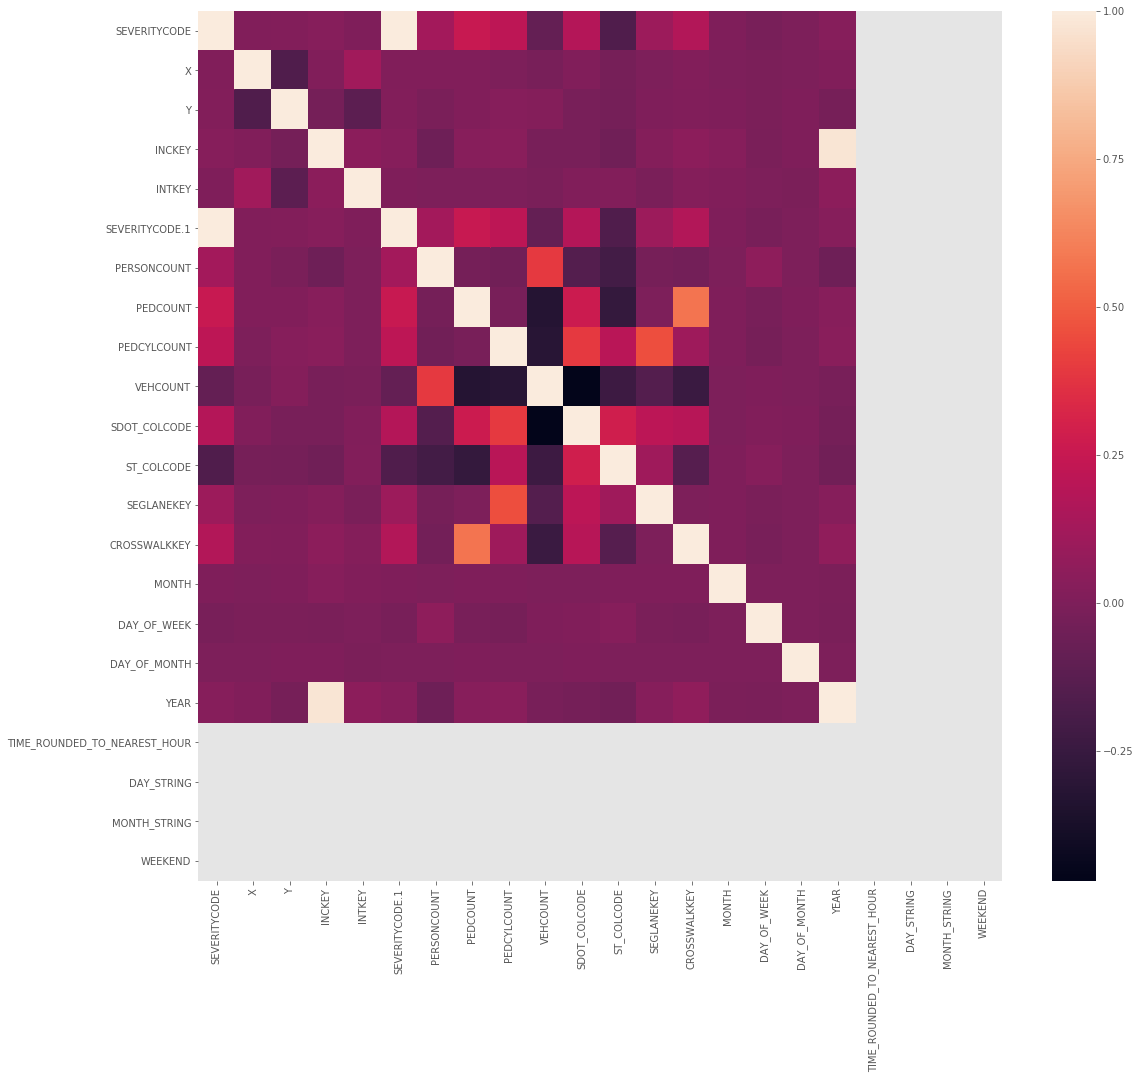

In [42]:
if "Alley" in df:
    del df["Alley"]

plt.rcParams["figure.figsize"] = (18,16)
corr = df.corr()
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


There seem to be only weak/marginal correlations between SEVERITYCODE and weather/light conditions, however there are is also an interesting correlation between PEDROWNOTGRT and "Dark - Street Lights On". Presumably this is because in low light conditions drivers often don't see pedestrians?

The purpose of the model is to predict the SEVERITYCODE of an accident based on the environmental/geographical conditions. There is little point building a model that tells us "count the injuries, and if there are a lot then the accident is serious!". We will have to consider excluding these features from the dataset.
Deciding whether to keep or remove other features is a bit more subjective, however it is helpful to think of this from the point of view of an emergency services operator: an accident has occurred, and you wish to be able to make a quick prediction as to its severity. What key features might you expect to be able to know about before the first responders arrive at the scene in order to be able to influence who you send? Clearly you cannot know the number of fatalities in advance, but might the person reporting the accident be able to provide some useful information to help you predict the severity of the accident? It seems logical that the time, day, date, weather and road conditions would be known at the time of the accident. It is also likely that the person reporting the accident would be able to tell you if there were pedestrians/cyclists involved, and how many cars. They may also be able to tell you if alcohol is obviously a factor, if the accident took place on a pedestrian crossing/crosswalk, whether the accident involved a parked car and to provide a brief description of the nature of the collision (which is encoded in _SDOT_COLCODE_ ). We should therefore keep these features.

As a reminder, the target variable is SEVERITYCODE , so this cannot be part of the feature set.

In [44]:
#Selecting relevant attributes and dealing with missing values

df_data = df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SEVERITYCODE']]
df_data = df_data.dropna()
df_data.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SEVERITYCODE
0,Angles,Overcast,Wet,Daylight,N,2
1,Sideswipe,Raining,Wet,Dark - Street Lights On,0,1
2,Parked Car,Overcast,Dry,Daylight,0,1
3,Other,Clear,Dry,Daylight,N,1
4,Angles,Raining,Wet,Daylight,0,2


In [46]:
#Checking data types
df_data.dtypes

COLLISIONTYPE    object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
UNDERINFL        object
SEVERITYCODE      int64
dtype: object

In [47]:
#Converting categorical features to numerical values by label encoding
df_data['UNDERINFL'].replace(to_replace=['N', 'Y', '0'], value=[0,1,0], inplace=True)
df_data['UNDERINFL'].value_counts()

0    175288
1      8858
Name: UNDERINFL, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder

attributes = df_data[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL']]

for attribute in ['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']:
    attributes[attribute] = attributes[attribute].astype('S')
    attributes[attribute] = LabelEncoder().fit_transform(attributes[attribute])
    
attributes.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,0,4,8,5,0
1,9,6,8,2,0
2,5,4,0,5,0
3,4,1,0,5,0
4,0,6,8,5,0


In [51]:
X = attributes
y = df_data['SEVERITYCODE'].values

## Train and test data


In [52]:
# We split X and Y into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (128902, 5) (128902,)
Test set: (55244, 5) (55244,)


In [53]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]
X_test[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-1.60586167,  1.03902786,  1.48326778,  0.35568222, -0.22442372],
       [-1.24769822, -0.72577014, -0.70879159,  0.35568222, -0.22442372],
       [-1.60586167, -0.72577014, -0.70879159,  0.35568222, -0.22442372],
       [-1.60586167, -0.72577014, -0.70879159,  0.35568222, -0.22442372],
       [ 0.90128251,  1.03902786,  1.48326778,  0.94166901, -0.22442372]])

# Classification: Modelling & Result Evaluation

The four models which will be built, tested and compared are:
- Decision Tree
- k-Nearest Neighbours (kNN)
- Logistic Regression

## 1. Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train, y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 2. K Nearest Neighbour (KNN)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

## 3. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.0001, solver='liblinear')
LR_model.fit(X_train, y_train)
LR_model

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Model evaluation using test set

In [58]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# KNN Model
yhat = KNN_model.predict(X_test)
yhat_knn = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_knn = f1_score(y_test, yhat, average='weighted')
precision_knn = precision_score(y_test, yhat, average='weighted')
knn_report = ['KNN', round(jaccard,2), round(f1_score_knn,2), round(precision_knn,2)]

# Logistic regression Model
yhat_proba = LR_model.predict_proba(X_test)
yhat = LR_model.predict(X_test)
yhat_lr = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_lr = f1_score(y_test, yhat, average='weighted')
precision_lr = precision_score(y_test, yhat, average='weighted')
lr_report = ['Logistic Regression', round(jaccard,2), round(f1_score_lr,2), round(precision_lr,2)]

# Decision tree Model
yhat = DT_model.predict(X_test)
yhat_tree = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_tree = f1_score(y_test, yhat, average='weighted')
precision_tree = precision_score(y_test, yhat, average='weighted')
tree_report = ['Decision Tree', round(jaccard,2), round(f1_score_tree,2), round(precision_tree,2)]


Model_eval_report = pd.DataFrame(data=np.array([knn_report,  lr_report, tree_report]), 
                      columns=['Algorithm', 'Jaccard', 'F1-score', 'Precision'])
Model_eval_report

,Algorithm,Jaccard,F1-score,Precision
0,KNN,0.73,0.68,0.71
1,Logistic Regression,0.7,0.58,0.67
2,Decision Tree,0.75,0.69,0.77
